# TASK 1 - Preguntas Teóricas

**1. Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque**
- _Descenso de gradiente:_ Es un algoritmo de optimización el cual calcula la gradiente en función de pérdida con respecto a parámetros del modelo utilizando todo el conjunto de datos de entrenamiento. Posteriormente se actualizan los parámetros en dirección opuesta al gradiente para que se pueda minimizar la pérdida.

    _Ventajas:_
    - Se aprovecha la eficiencia de las operaciones vectorizadas en hardware moderno
    - Puede converger a la solución global en problemas convexos

    _Desventajas:_
    - Requiere que el conjunto de datos esté presente en memoria, teniendo una impracticidad con conjuntos de datos grandes.
    - La actualización de parámetros ocurre luego de procesar todo el conjunto de datos, teniendo un costo computacional alto.

- _Descenso de gradiente por mini batches:_ Esta variante del descenso de gradiente divide el conjunto de datos de entrenamiento en batches mucho más pequeños para calcular la gradiente de cada lote, actualizando los parámetros del modelo luego de cada mini batch.

    _Ventajas:_
    - Aprovecha la eficiencia de operaciones vectorizadas.
    - Maneja conjuntos de datos más grandes.
    - Utiliza la paralelización y se beneficia de ella y de la aceleración de hardware moderno.

    _Desventajas:_
    - Puede no converger tan rápidamente
    - Requiere ajuste de hiperparámetros como el tamaño del mini lote 

- _Descenso de gradiente estocástico:_ Esta versión resulta mucho más eficiente que el algoritmo de descenso de gradiente por mini batches pues, en lugar de utilizar lotes predefinidos, este selecciona un ejemplo de entrenamiento de modo aleatorio en cada iteración, con el cual se le calcula el gradiente y se actualizan los parámetros del modelo.

    _Ventajas:_
    - Puede converger rápidamente en problemas no convexos y no estacionarios
    - Utiliza una menor carga computacional por iteración

    _Desventajas:_
    - Tiene una mayor viabilidad en las actualizaciones de parámetros debido a la aleatoriedad de la selección de batches
    - No aprovecha completamente la eficiencia de las operaciones vectorizadas

**2. Compare y contraste técnicas de extracción de features (feature extraction) y selección de features (feature selection) en machine learning. De ejemplos de escenarios donde cada técnica sería más apropiada**

Definiendo la extracción de features como la transformación de los datos originales en un nuevo conjunto de características, generalmente más pequeño y más significativo, y la selección de features como elegir un subconjunto de las características originales para luego eliminar aquellas que se consideran mejor importantes o redundantes. Ambas técnicas buscan mejorar el rendimiento de modelos y la eficiencia computación de ellos, mediante la reducción de la dimensionalidad. 

Sin embargo, la extracción de features crea nuevas representaciones, mientras que la selección únicamente elige subconjuntos de los datos originales. Por último, vale la pena resaltar que la extracción puede ser más adecuada para capturar información más compleja y abstracta, mientras que la selección se prefiere cuando la interpretación de las características es crucial o se desea mantener la integridad de las características originales.

**3. Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros**

Este tipo de red neuronal consta únicamente por una capa de entrada y una de salida, el cual es comúnmente utilizado para problemas de clasificación binaria linealmente separables. Su arquitectura está dividida en la capa de entrada y la de salida, donde la capa de entrada consta de nodos que representan características de la entrada del problema y cada nodo está conectado a los demás mediante un peso asociado. Por su parte, la capa de salida consiste en un único nodo que es producido por la salida de la red.

Por otro lado, el funcionamiento de esta red está dividido en la inicialización, donde se asignan pesos aleatorios o predefinidos a las conexiones de los nodos, la propagación hacia adelante, la cual calcula la salida el perceptrón mediante la suma del producto de cada entrada con su respectivo peso, el cálculo de error, donde se compara la salida obtenida con la deseada, la actualización de pesos, donde estos se actualizan de acuerdo con la regla de aprendizaje del perceptrón para reducir el error, y la iteración, que es donde los pasos anteriores se repiten para cada muestra de entrenamiento hasta que el error se considera aceptable o hasta que se alcance el número de iteraciones predefinido.

## TASK 2 - Ejercicios prácticos

### Task 2.1 - Gradiente Descendiente Estocástico

Descenso de gradiente

In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
def gradientDescent(X, Y, theta, alpha, numIterations):
    Xtrans = X.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(X, theta)
        loss = hypothesis - Y

        cst = np.sum(loss ** 2) / (2 * numPoints)
        print("Iteration %d | Cost: %f" % (i, cst))
        
        gradient = np.dot(Xtrans, loss) / numPoints
        theta = theta - alpha * gradient

        alpha = alpha / (1 + i)

        print("Theta en la iteración %d:" % i, theta)
        print("Gradiente en la iteración %d:" % i, gradient)
        
    return theta

def genData(numPoints, bias, variance):
    X = np.zeros(shape=(numPoints, 2))
    Y = np.zeros(shape=numPoints)
    for i in range(0, numPoints):
        X[i][0] = 1  # Bias term
        X[i][1] = i
        Y[i] = 2 * i**3 - 3 * i**2 + 5 * i + 3 + np.random.uniform(0, variance)
    return X, Y

numPoints = 90
X, Y = genData(numPoints, 20, 9)

a, b = np.shape(X)

numIterations = 1000
alpha = 0.001 

theta = np.ones(2)

theta = gradientDescent(X, Y, theta, alpha, numIterations)

print("Parámetros finales del modelo:", theta)

x_real = np.linspace(0, numPoints, 100)
y_real = 2 * x_real**3 - 3 * x_real**2 + 5 * x_real + 3

x_approximated = np.linspace(0, numPoints, 100)
y_approximated = np.dot(np.column_stack((np.ones(100), x_approximated)), theta)

print("Valores específicos:")
for i in range(10):
    index = np.random.randint(numPoints)
    x_value = X[index, 1]
    y_real_value = y_real[index]
    y_approximated_value = y_approximated[index]

    print(f"Índice: {index}, x: {x_value}, Real: {y_real_value}, Aproximado: {y_approximated_value}")


Iteration 0 | Cost: 140450784070.348877
Theta en la iteración 0: [  349.66436932 24997.65559977]
Gradiente en la iteración 0: [  -348664.36931813 -24996655.5997666 ]
Iteration 1 | Cost: 345401923740.481323
Theta en la iteración 1: [  -414.37109992 -16391.49109155]
Gradiente en la iteración 1: [  764035.4692408 41389146.691315 ]
Iteration 2 | Cost: 907396063482.397339
Theta en la iteración 2: [  124.90169707 17878.47668026]
Gradiente en la iteración 2: [ -1078545.59399196 -68539935.54362279]
Iteration 3 | Cost: 117930206394.213058
Theta en la iteración 3: [   50.40048963 14132.38698171]
Gradiente en la iteración 3: [  447007.24465064 22476538.1912981 ]
Iteration 4 | Cost: 52340424379.244164
Theta en la iteración 4: [   38.72416664 13610.43988215]
Gradiente en la iteración 4: [  280231.75185774 12526730.38963445]
Iteration 5 | Cost: 46160804879.718468
Theta en la iteración 5: [   36.58255472 13517.60359671]
Gradiente en la iteración 5: [  256993.42960397 11140354.25272464]
Iteration 6 | 

Iteration 984 | Cost: 44946206775.165802
Theta en la iteración 984: [   36.17429993 13500.01766194]
Gradiente en la iteración 984: [  252077.09093807 10847051.38530437]
Iteration 985 | Cost: 44946206775.165802
Theta en la iteración 985: [   36.17429993 13500.01766194]
Gradiente en la iteración 985: [  252077.09093807 10847051.38530437]
Iteration 986 | Cost: 44946206775.165802
Theta en la iteración 986: [   36.17429993 13500.01766194]
Gradiente en la iteración 986: [  252077.09093807 10847051.38530437]
Iteration 987 | Cost: 44946206775.165802
Theta en la iteración 987: [   36.17429993 13500.01766194]
Gradiente en la iteración 987: [  252077.09093807 10847051.38530437]
Iteration 988 | Cost: 44946206775.165802
Theta en la iteración 988: [   36.17429993 13500.01766194]
Gradiente en la iteración 988: [  252077.09093807 10847051.38530437]
Iteration 989 | Cost: 44946206775.165802
Theta en la iteración 989: [   36.17429993 13500.01766194]
Gradiente en la iteración 989: [  252077.09093807 10847

Iteration 1960 | Cost: 44946206775.165802
Theta en la iteración 1960: [   36.17429993 13500.01766194]
Gradiente en la iteración 1960: [  252077.09093807 10847051.38530437]
Iteration 1961 | Cost: 44946206775.165802
Theta en la iteración 1961: [   36.17429993 13500.01766194]
Gradiente en la iteración 1961: [  252077.09093807 10847051.38530437]
Iteration 1962 | Cost: 44946206775.165802
Theta en la iteración 1962: [   36.17429993 13500.01766194]
Gradiente en la iteración 1962: [  252077.09093807 10847051.38530437]
Iteration 1963 | Cost: 44946206775.165802
Theta en la iteración 1963: [   36.17429993 13500.01766194]
Gradiente en la iteración 1963: [  252077.09093807 10847051.38530437]
Iteration 1964 | Cost: 44946206775.165802
Theta en la iteración 1964: [   36.17429993 13500.01766194]
Gradiente en la iteración 1964: [  252077.09093807 10847051.38530437]
Iteration 1965 | Cost: 44946206775.165802
Theta en la iteración 1965: [   36.17429993 13500.01766194]
Gradiente en la iteración 1965: [  252

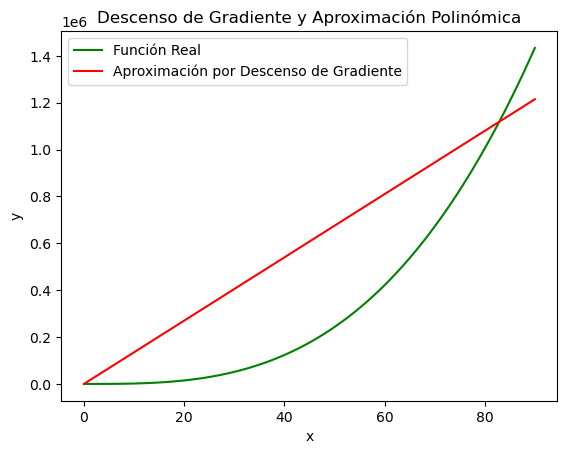

In [124]:
plt.plot(x_real, y_real, label='Función Real', color='green')
plt.scatter(X[:, 1], Y, color='blue', label='Puntos de Muestra Real')
plt.plot(x_approximated, y_approximated, color='red', label='Aproximación por Descenso de Gradiente')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Descenso de Gradiente y Aproximación Polinómica')
plt.show()

A través del descenso de gradiente, hemos mejorado la aproximación de nuestro modelo polinómico de tercer grado a los datos reales. Aunque el costo final es elevado, la visualización revela una mejor alineación entre la curva real y la aproximación del modelo. Experimentaremos con más ajustes de hiperparámetros para mejorar aún más la convergencia y el ajuste del modelo. 

Descenso de gradiente estocástico

In [196]:
import numpy as np
import matplotlib.pyplot as plt

In [213]:
def polynomial_function(x):
    return 2 * x**3 - 3 * x**2 + 5 * x + 3

def derivative_polynomial_function(x):
    return np.polyval(np.polyder([2, -3, 5, 3]), x)

def cost_function(y_true, y_pred):
    return np.mean((y_true - y_pred)**2) / 2

def stochastic_gradient_descent(initial_x, learning_rate, num_iterations):
    x_values = [initial_x]
    costs = []

    for i in range(num_iterations):
        current_x = x_values[-1]
        gradient = derivative_polynomial_function(current_x)
        new_x = current_x - learning_rate * gradient
        x_values.append(new_x)

        y_pred = polynomial_function(new_x)
        cost = cost_function(polynomial_function(current_x), y_pred)
        costs.append(cost)
        
        print("Iteración {}: Costo {}".format(i + 1, cost))

    return np.array(x_values), np.array(costs)

initial_guess = 0.0
learning_rate = 0.0001
num_iterations = 500

x_values, costs = stochastic_gradient_descent(initial_guess, learning_rate, num_iterations)
y_values_approximated = polynomial_function(x_values)

Iteración 1: Costo 3.126875906437157e-06
Iteración 2: Costo 3.1343928048254164e-06
Iteración 3: Costo 3.141935313070638e-06
Iteración 4: Costo 3.1495035335803375e-06
Iteración 5: Costo 3.157097569231694e-06
Iteración 6: Costo 3.1647175233723643e-06
Iteración 7: Costo 3.172363499833595e-06
Iteración 8: Costo 3.180035602922154e-06
Iteración 9: Costo 3.1877339374245255e-06
Iteración 10: Costo 3.1954586086156218e-06
Iteración 11: Costo 3.2032097222551903e-06
Iteración 12: Costo 3.210987384593187e-06
Iteración 13: Costo 3.2187917023684286e-06
Iteración 14: Costo 3.2266227828173758e-06
Iteración 15: Costo 3.2344807336728127e-06
Iteración 16: Costo 3.242365663164771e-06
Iteración 17: Costo 3.2502776800293814e-06
Iteración 18: Costo 3.2582168935030446e-06
Iteración 19: Costo 3.2661834133301743e-06
Iteración 20: Costo 3.2741773497698545e-06
Iteración 21: Costo 3.2821988135866105e-06
Iteración 22: Costo 3.2902479160673053e-06
Iteración 23: Costo 3.2983247690096407e-06
Iteración 24: Costo 3.30642

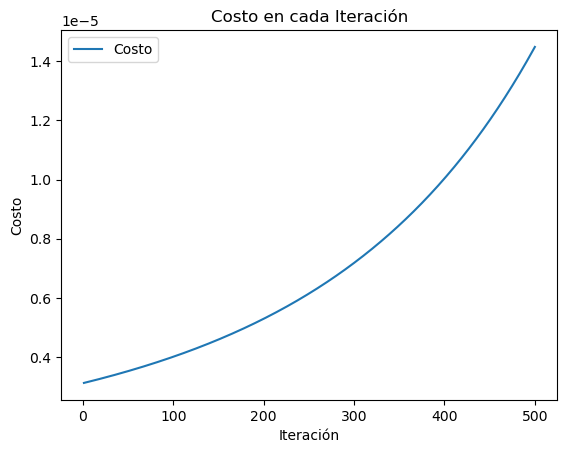

In [214]:
plt.plot(range(1, num_iterations + 1), costs, label='Costo')
plt.xlabel('Iteración')
plt.ylabel('Costo')
plt.legend()
plt.title('Costo en cada Iteración')
plt.show()

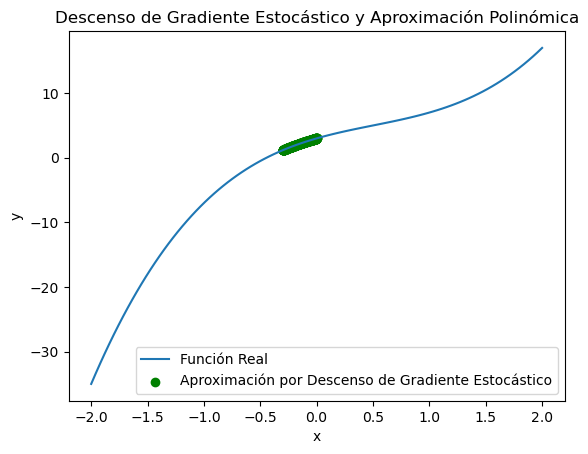

In [215]:
plt.plot(x_real, y_real, label='Función Real')
plt.scatter(x_values, y_values_approximated, color='green', label='Aproximación por Descenso de Gradiente Estocástico')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Descenso de Gradiente Estocástico y Aproximación Polinómica')
plt.show()

Referencias: https://pythonguia.com/scikit-aprender-descenso-de-gradiente/